In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
covid_19_data.csv  Meteorite_Landings.csv  test.csv
london_merged.csv  poblacion.csv


In [3]:
import pandas as pd
pd.__version__

'1.1.5'

In [4]:
df = pd.read_csv('covid_19_data.csv')
df.sample()
df['ObservationDate']= pd.to_datetime(df['ObservationDate'])

In [5]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
172475,172476,2020-12-06,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,2020-12-06,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,2020-12-06,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,2020-12-06,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0


In [6]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [7]:
df = df [['ObservationDate',
  'Country/Region',
  'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
172475,2020-12-06,Ukraine,36539.0,337.0,6556.0
172476,2020-12-06,Netherlands,6710.0,104.0,0.0
172477,2020-12-06,Mainland China,1295.0,1.0,1288.0
172478,2020-12-06,Ukraine,31967.0,531.0,22263.0


In [8]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [9]:
df_time.tail(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-12-02,64530517.0,1493742.0,41496318.0
2020-12-03,65221040.0,1506260.0,41932091.0
2020-12-04,65899441.0,1518670.0,42352021.0
2020-12-05,66540034.0,1528868.0,42789879.0
2020-12-06,67073728.0,1536056.0,43103827.0


In [10]:
df1= df_time['Confirmed'].iloc[10:15]
df1


ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [11]:
df2= df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [12]:
df1 - df2
#SOBREVIVIENTES (CONFIRMADOS - MUERTOS)

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [13]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-12-02,64530517.0,1493742.0,41496318.0
2020-12-03,65221040.0,1506260.0,41932091.0
2020-12-04,65899441.0,1518670.0,42352021.0


In [19]:
df_diff= df_time.diff()
#RESTA DIA AL DIA ANTERIOR

In [20]:
df_time.diff().mean()
#PROMEDIO POR DIA

Confirmed    210260.730408
Deaths         4815.169279
Recovered    135121.626959
dtype: float64

In [21]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [22]:
df_diff= df_diff.fillna({'Confirmed': 555.0,
 'Deaths':  17.0,
 'Recovered': 28.0})

In [23]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-12-02,646532.0,12436.0,461384.0
2020-12-03,690523.0,12518.0,435773.0
2020-12-04,678401.0,12410.0,419930.0


In [ ]:
df_diff.resample('7D').sum()   #SUMA DE CASO CADA 7 DIAS

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,107.0
2020-01-29,18314.0,361.0,745.0
2020-02-05,20911.0,621.0,3831.0
2020-02-12,30335.0,894.0,9669.0
2020-02-19,5277.0,701.0,13553.0
2020-02-26,12433.0,452.0,20323.0
2020-03-04,25750.0,1102.0,16172.0
2020-03-11,78613.0,3643.0,16432.0
2020-03-18,220902.0,10711.0,26845.0


In [24]:
df_diff.resample('M').mean()  #PROMEDIO MENSUAL

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.689655,94.068966,1364.103448
2020-03-31,24900.354839,1263.516129,4459.129032
2020-04-30,79964.966667,6376.033333,27903.400000
2020-05-31,93882.838710,4472.548387,52454.064516
2020-06-30,143643.400000,4640.966667,90382.466667
2020-07-31,229876.612903,5431.193548,161934.322581
2020-08-31,255213.741935,5523.000000,208141.516129
2020-09-30,283282.133333,5467.700000,228240.100000


In [27]:
df_cum= df_diff.resample('12h').sum(min_count=1)   #SUMA DE CASO CADA 12HORAS
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-12-04 00:00:00,678401.0,12410.0,419930.0
2020-12-04 12:00:00,NaN,NaN,NaN
2020-12-05 00:00:00,640593.0,10198.0,437858.0


In [28]:
df_cum.bfill()  #COPIA EL VALOR SIGUIENTE DONDE HABIA UN VALOR NULO

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,98.0,1.0,2.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,288.0,8.0,6.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-12-04 00:00:00,678401.0,12410.0,419930.0
2020-12-04 12:00:00,640593.0,10198.0,437858.0
2020-12-05 00:00:00,640593.0,10198.0,437858.0


In [29]:
df_cum.ffill() #ME TRAE EL VALOR PREVIO PARA COMPLETAR EL NULO

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,98.0,1.0,2.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-12-04 00:00:00,678401.0,12410.0,419930.0
2020-12-04 12:00:00,678401.0,12410.0,419930.0
2020-12-05 00:00:00,640593.0,10198.0,437858.0


In [30]:
df_cum.fillna("NO HAY DATOS") #SE PUEDE RELLENAR CON UN VALOR QUE LE PASEMOS

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555,17,28
2020-01-22 12:00:00,NO HAY DATOS,NO HAY DATOS,NO HAY DATOS
2020-01-23 00:00:00,98,1,2
2020-01-23 12:00:00,NO HAY DATOS,NO HAY DATOS,NO HAY DATOS
2020-01-24 00:00:00,288,8,6
...,...,...,...
2020-12-04 00:00:00,678401,12410,419930
2020-12-04 12:00:00,NO HAY DATOS,NO HAY DATOS,NO HAY DATOS
2020-12-05 00:00:00,640593,10198,437858


In [31]:
df_cum= df_cum.interpolate()    #NOS INTERPOLA UN VALOR MEDIO 
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,326.5,9.0,15.0
2020-01-23 00:00:00,98.0,1.0,2.0
2020-01-23 12:00:00,193.0,4.5,4.0
2020-01-24 00:00:00,288.0,8.0,6.0
...,...,...,...
2020-12-04 00:00:00,678401.0,12410.0,419930.0
2020-12-04 12:00:00,659497.0,11304.0,428894.0
2020-12-05 00:00:00,640593.0,10198.0,437858.0


In [33]:
df_cum['rate_survivors'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']  #TASA SUPERVIVENCIA

,Confirmed,Deaths,Recovered,rate,rate_survivors
ObservationDate,,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369,0.969369
2020-01-22 12:00:00,326.5,9.0,15.0,0.972435,0.972435
2020-01-23 00:00:00,98.0,1.0,2.0,0.989796,0.989796
2020-01-23 12:00:00,193.0,4.5,4.0,0.976684,0.976684
2020-01-24 00:00:00,288.0,8.0,6.0,0.972222,0.972222
...,...,...,...,...,...
2020-12-04 00:00:00,678401.0,12410.0,419930.0,0.981707,0.981707
2020-12-04 12:00:00,659497.0,11304.0,428894.0,0.982860,0.982860
2020-12-05 00:00:00,640593.0,10198.0,437858.0,0.984080,0.984080


In [34]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate,rate_survivors
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369,0.969369
1,2020-01-22 12:00:00,326.5,9.0,15.0,0.972435,0.972435
2,2020-01-23 00:00:00,98.0,1.0,2.0,0.989796,0.989796
3,2020-01-23 12:00:00,193.0,4.5,4.0,0.976684,0.976684
4,2020-01-24 00:00:00,288.0,8.0,6.0,0.972222,0.972222
...,...,...,...,...,...,...
634,2020-12-04 00:00:00,678401.0,12410.0,419930.0,0.981707,0.981707
635,2020-12-04 12:00:00,659497.0,11304.0,428894.0,0.982860,0.982860
636,2020-12-05 00:00:00,640593.0,10198.0,437858.0,0.984080,0.984080
637,2020-12-05 12:00:00,587143.5,8693.0,375903.0,0.985194,0.985194


In [35]:
df_cum.groupby(pd.Grouper(key= 'ObservationDate', freq='M'))[['rate']].mean()   #GROUP BY DE SERIES DE TIEMPO

,rate
ObservationDate,
2020-01-31,0.977533
2020-02-29,0.940045
2020-03-31,0.953774
2020-04-30,0.919984
2020-05-31,0.951836
2020-06-30,0.967370
2020-07-31,0.976472
2020-08-31,0.978591
2020-09-30,0.980588


In [37]:
sr = df_cum.groupby(pd.Grouper(key= 'ObservationDate', freq='1D'))['rate'].mean()
sr

ObservationDate
2020-01-22    0.970902
2020-01-23    0.983240
2020-01-24    0.970824
2020-01-25    0.971159
2020-01-26    0.976274
                ...   
2020-12-02    0.981051
2020-12-03    0.981831
2020-12-04    0.982283
2020-12-05    0.984637
2020-12-06    0.986532
Freq: D, Name: rate, Length: 320, dtype: float64

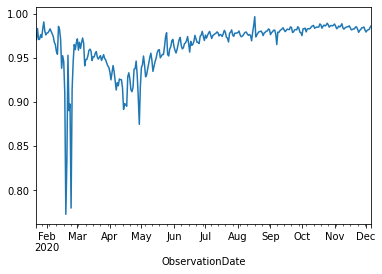

In [38]:
sr.plot()


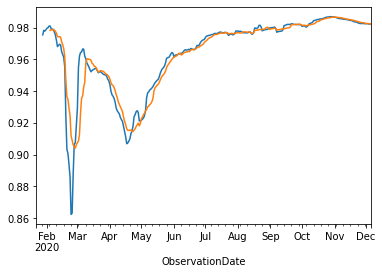

In [40]:
sr.rolling(window=7).mean().plot()  #PERMITE HACER PROMEDIO CON VENTANA DE FRECUENCIA
sr.rolling(window=14).mean().plot()

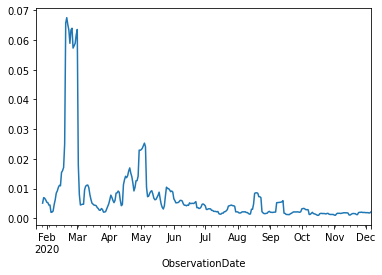

In [43]:
import numpy as np
sr.rolling(window=7).apply(lambda x: np.std(x)).plot()   #CALCULO DESVIACION ESTANDAR SUPERVIVENCIA

Text(0.5, 1.0, 'Promedio móvil de Tasa de Supervivencia')

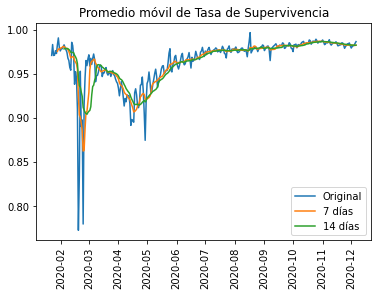

In [44]:
import matplotlib.pyplot as plt

plt.plot(sr, label = 'Original')
plt.plot(sr.rolling(window = 7).mean(), label = '7 días')
plt.plot(sr.rolling(window = 14).mean(), label = '14 días')
plt.xticks(rotation = '90')
plt.legend()
plt.title('Promedio móvil de Tasa de Supervivencia')

In [45]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
France             2290891.0
India              1852266.0
UK                 1479097.0
Argentina          1463110.0
US                 1366673.0
                     ...    
Gambia, The              1.0
East Timor               1.0
Curacao                  1.0
Channel Islands          1.0
 Azerbaijan              1.0
Name: Confirmed, Length: 226, dtype: float64

In [46]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region                 ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[53014 rows x 3 columns]

In [48]:
df_arg = df_time.loc['Argentina', :]
df_arg

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-03,1.0,0.0,0.0
2020-03-04,1.0,0.0,0.0
2020-03-05,1.0,0.0,0.0
2020-03-06,2.0,0.0,0.0
2020-03-07,8.0,0.0,0.0
...,...,...,...
2020-12-02,1440103.0,39156.0,1268358.0
2020-12-03,1447732.0,39305.0,1274675.0
2020-12-04,1454631.0,39512.0,1281955.0


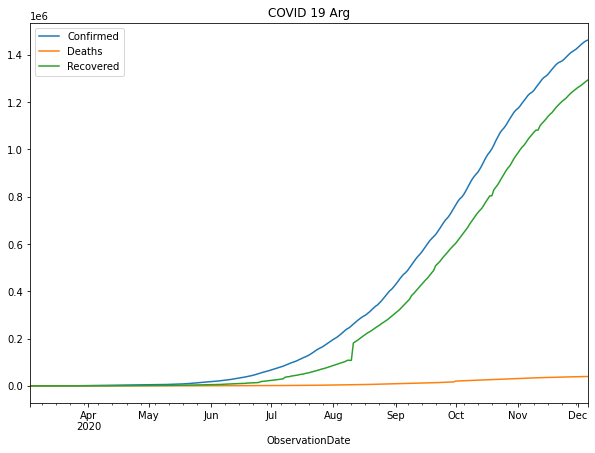

In [49]:
df_arg.plot(figsize= (10,7), title="COVID 19 Arg")

In [50]:
import matplotlib.pyplot as plt


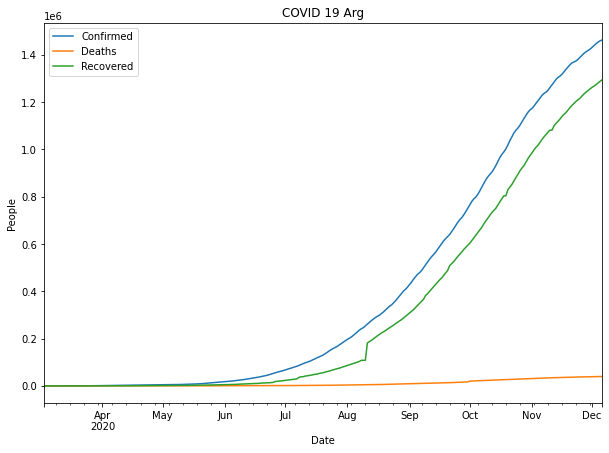

In [51]:
df_arg.plot(figsize= (10,7), title="COVID 19 Arg")
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

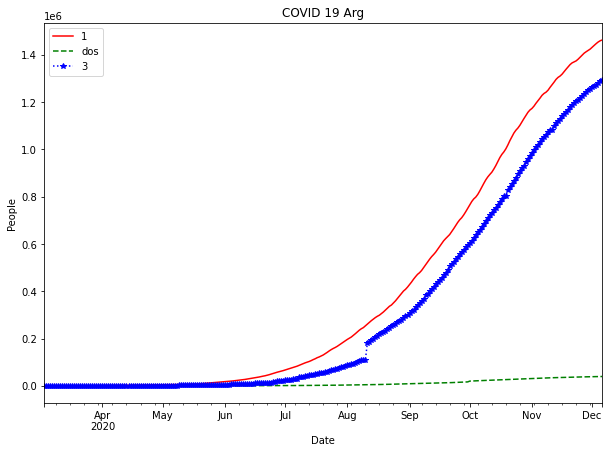

In [52]:
ax = df_arg.plot(figsize= (10,7), title="COVID 19 Arg",
            legend = False, 
            style= ['r-', 'g--', 'b:*'])
ax.legend(['1', 'dos', '3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [53]:
df_monthly = df_arg.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-31,1054.0,27.0,240.0
2020-04-30,4428.0,218.0,1256.0
2020-05-31,16851.0,539.0,5336.0
2020-06-30,64530.0,1307.0,22028.0
2020-07-31,191302.0,3543.0,83780.0
2020-08-31,417735.0,8660.0,301195.0
2020-09-30,751001.0,16937.0,594645.0
2020-10-31,1166924.0,31002.0,973939.0
2020-11-30,1424533.0,38730.0,1257227.0


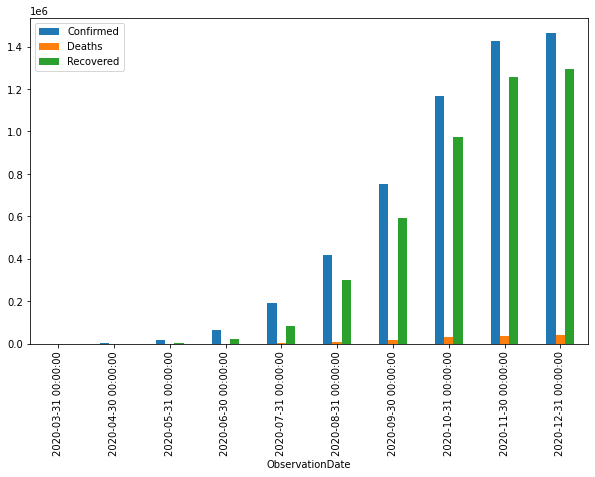

In [59]:
df_monthly.plot(figsize=(10,6), kind='bar')

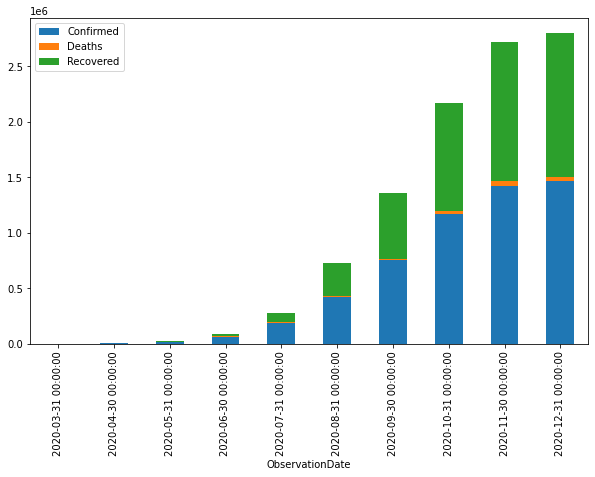

In [60]:
df_monthly.plot(figsize=(10,6), kind='bar', stacked = True)

In [61]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly 

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-03-31,1054.0,27.0,240.0,787.0
2020-04-30,4428.0,218.0,1256.0,2954.0
2020-05-31,16851.0,539.0,5336.0,10976.0
2020-06-30,64530.0,1307.0,22028.0,41195.0
2020-07-31,191302.0,3543.0,83780.0,103979.0
2020-08-31,417735.0,8660.0,301195.0,107880.0
2020-09-30,751001.0,16937.0,594645.0,139419.0
2020-10-31,1166924.0,31002.0,973939.0,161983.0
2020-11-30,1424533.0,38730.0,1257227.0,128576.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe81d382748>,
      dtype=object)

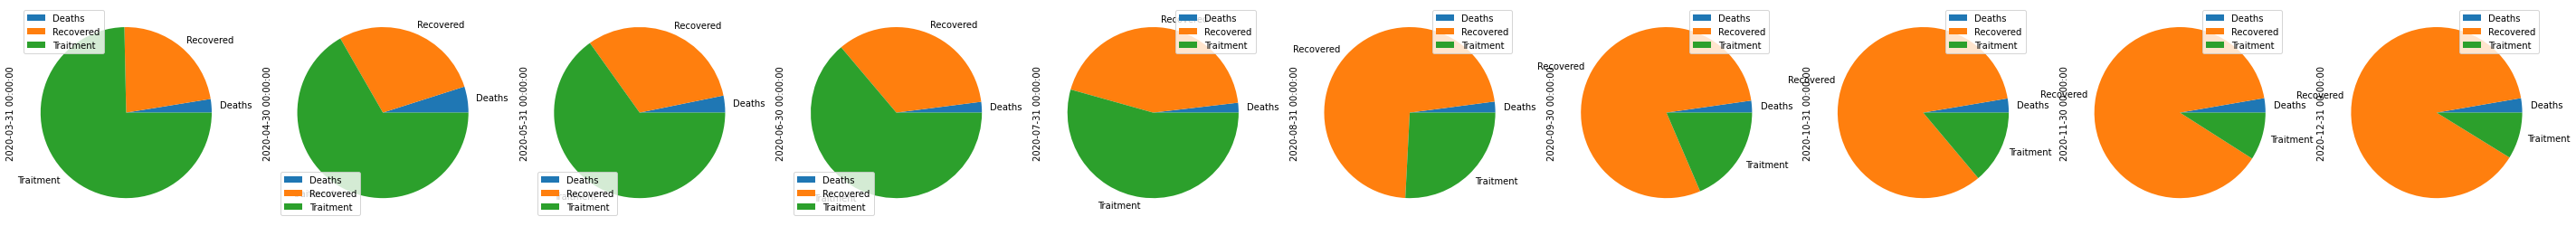

In [67]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize=(50,35), kind='pie', subplots=True)

In [68]:
df_arg

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-03,1.0,0.0,0.0
2020-03-04,1.0,0.0,0.0
2020-03-05,1.0,0.0,0.0
2020-03-06,2.0,0.0,0.0
2020-03-07,8.0,0.0,0.0
...,...,...,...
2020-12-02,1440103.0,39156.0,1268358.0
2020-12-03,1447732.0,39305.0,1274675.0
2020-12-04,1454631.0,39512.0,1281955.0


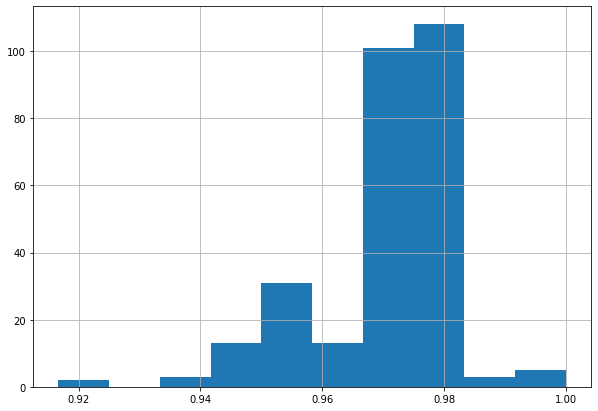

In [70]:
df_arg['rate'] = 1 - df_arg['Deaths'] / df_arg['Confirmed']
df_arg['rate'].hist(figsize=(10,7), bins = 10)

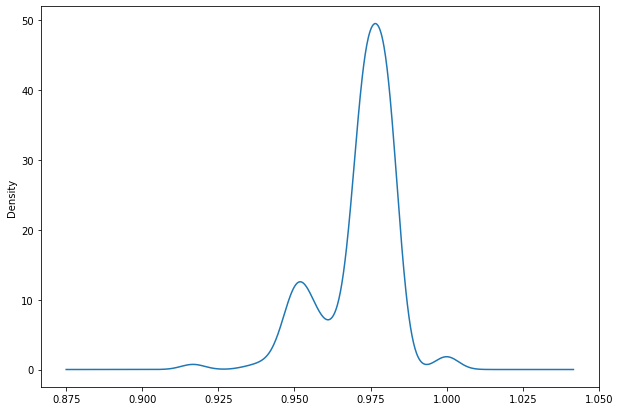

In [72]:
df_arg['rate'].plot(kind= 'kde',figsize=(10,7))